## Keras Test

In [1]:
# Plot ad hoc mnist instances
import tensorflow as tf
import matplotlib.pyplot as plt


2024-05-07 07:53:18.117555: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# List all available physical devices (CPUs and GPUs)
physical_devices = tf.config.list_physical_devices()
print("Available physical devices:", physical_devices)

Available physical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [9]:
# Check if GPUs are available
gpus_available = tf.config.list_physical_devices('GPU')
if gpus_available:
    print("GPUs are available. TensorFlow is configured to use GPU.")
else:
    print("No GPUs are available. TensorFlow is likely configured to use CPU.")

GPUs are available. TensorFlow is configured to use GPU.


In [2]:
tf.keras.backend.backend()

'tensorflow'

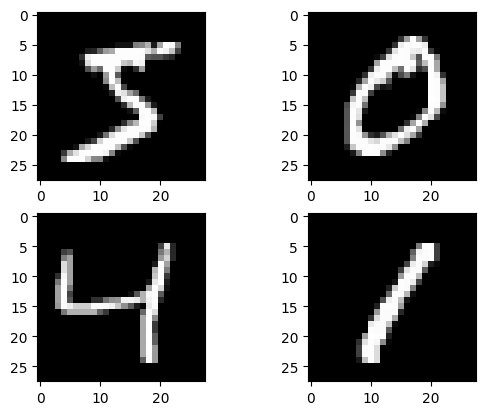

In [3]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

### MLP

In [4]:
%%time
# Baseline MLP for MNIST dataset
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.utils as np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-07 07:53:33.072815: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:999] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-07 07:53:33.073031: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:999] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355

Epoch 1/10


2024-05-07 07:53:34.197162: I external/local_xla/xla/service/service.cc:145] XLA service 0x7f7c2c0077a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-07 07:53:34.197191: I external/local_xla/xla/service/service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-05-07 07:53:34.197196: I external/local_xla/xla/service/service.cc:153]   StreamExecutor device (1): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-05-07 07:53:34.219800: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-07 07:53:34.292262: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:469] Loaded cuDNN version 8906
2024-05-07 07:53:34.887509: I external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:351] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_116', 244 bytes spill

300/300 - 3s - 9ms/step - accuracy: 0.9197 - loss: 0.2800 - val_accuracy: 0.9582 - val_loss: 0.1405
Epoch 2/10
300/300 - 0s - 1ms/step - accuracy: 0.9682 - loss: 0.1112 - val_accuracy: 0.9713 - val_loss: 0.0925
Epoch 3/10
300/300 - 0s - 1ms/step - accuracy: 0.9794 - loss: 0.0708 - val_accuracy: 0.9780 - val_loss: 0.0718
Epoch 4/10
300/300 - 0s - 958us/step - accuracy: 0.9857 - loss: 0.0489 - val_accuracy: 0.9764 - val_loss: 0.0717
Epoch 5/10
300/300 - 0s - 1ms/step - accuracy: 0.9893 - loss: 0.0374 - val_accuracy: 0.9791 - val_loss: 0.0644
Epoch 6/10
300/300 - 0s - 986us/step - accuracy: 0.9929 - loss: 0.0267 - val_accuracy: 0.9813 - val_loss: 0.0587
Epoch 7/10
300/300 - 0s - 1ms/step - accuracy: 0.9951 - loss: 0.0197 - val_accuracy: 0.9795 - val_loss: 0.0648
Epoch 8/10
300/300 - 0s - 876us/step - accuracy: 0.9962 - loss: 0.0156 - val_accuracy: 0.9812 - val_loss: 0.0611
Epoch 9/10
300/300 - 0s - 1ms/step - accuracy: 0.9972 - loss: 0.0119 - val_accuracy: 0.9809 - val_loss: 0.0591
Epoch 

2024-05-07 07:53:39.781848: I external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:351] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_48', 152 bytes spill stores, 152 bytes spill loads



Baseline Error: 1.76%
CPU times: user 17.1 s, sys: 1.69 s, total: 18.7 s
Wall time: 7.79 s


### CNN

In [5]:
%%time
# Simple CNN for the MNIST Dataset
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.utils as np_utils
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define a simple CNN model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8576 - loss: 0.4950 - val_accuracy: 0.9791 - val_loss: 0.0725
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9774 - loss: 0.0794 - val_accuracy: 0.9821 - val_loss: 0.0526
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9835 - loss: 0.0549 - val_accuracy: 0.9869 - val_loss: 0.0391
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9876 - loss: 0.0409 - val_accuracy: 0.9869 - val_loss: 0.0380
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9904 - loss: 0.0315 - val_accuracy: 0.9889 - val_loss: 0.0337
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9919 - loss: 0.0264 - val_accuracy: 0.9876 - val_loss: 0.0388
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9925 - loss: 0.0230 - val_accuracy: 0.9901 - val_loss: 0.0299
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9944 - loss: 0.0182 - val_accuracy: 0.